<a href="https://colab.research.google.com/github/Livy-Li/Global_MLDS_Career_Development_Analysis/blob/main/Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
upload = files.upload()

Saving clean_kaggle_data.csv to clean_kaggle_data.csv


In [ ]:
df = pd.read_csv('clean_kaggle_data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploratory data analysis

Through exploratory data analysis, some relevant information can be extracted from the dataset and used for analysis. The dataset is a summary of survey responses to multiple choice questions pertaining to people around the world whose work is related to machine learning and data science. The dataset is cleaned based on participant answers to Q24, which asks for their annual salary in US dollars, participants are eliminated from the dataset if they left this question blank. 

The cleaned dataset has 10729 participants (rows) left, and 356 columns recording their answers to different questions. There are numerous insights that can be drawn from this particular dataset, three of such data trends are briefly discussed below.


In [ ]:
df

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,PyCharm,NaN,NaN,Sublime Text,Vim / Emacs,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,20024,2104,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,Python,NaN,NaN,NaN,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automated feature engineering/selection (e.g. ...,"Automated model selection (e.g. auto-sklearn, ...",NaN,Automated hyperparameter tuning (e.g. hyperopt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auto-Keras,Auto-Sklearn,Auto_ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN
10725,20029,5461,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,SQL,C,NaN,NaN,NaN,NaN,Na

In [ ]:
df.shape

(10729, 356)

In [ ]:
#selecting columns we are gonna use, and rename them
#Q1-age, Q2-gender, Q3-country, Q4-education, Q5-job title, Q24-salary
df1=df.copy()
df1=df1[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q24']].rename(columns={'Q1':'age', 'Q2':'gender', 'Q3':'country', 'Q4':'education', 'Q5':'job_title', 'Q24':'salary'})
#checking for any nan values, there is no nan values in any of the columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10729 entries, 0 to 10728
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10729 non-null  object
 1   gender     10729 non-null  object
 2   country    10729 non-null  object
 3   education  10729 non-null  object
 4   job_title  10729 non-null  object
 5   salary     10729 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 503.0+ KB


In [ ]:
#Use abbreviations for countries with longer names
df1.country = df1.country.replace({"United States of America":"US",
                                   "United Arab Emirates":"UAE",
                                   "United Kingdom of Great Britain and Northern Ireland":"UK",
                                   "Iran, Islamic Republic of...":"Iran"})

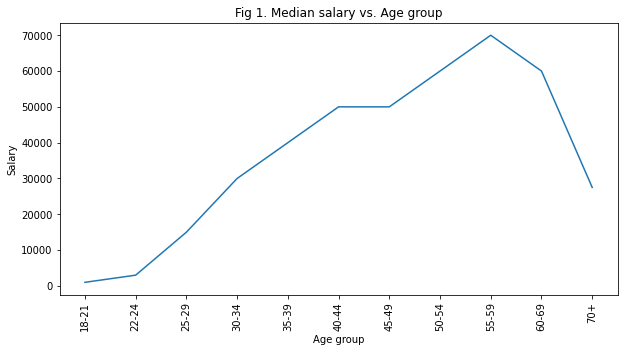

In [ ]:
#1.For different age group (from youngest to oldest), median salary trend  
plt.figure(figsize=(10, 5))
plt.plot(df1.groupby('age').median().index, df1.groupby('age').median().salary)
plt.xticks(rotation=90)
plt.title('Fig 1. Median salary vs. Age group')
plt.xlabel('Age group')
plt.ylabel('Salary')
plt.show()

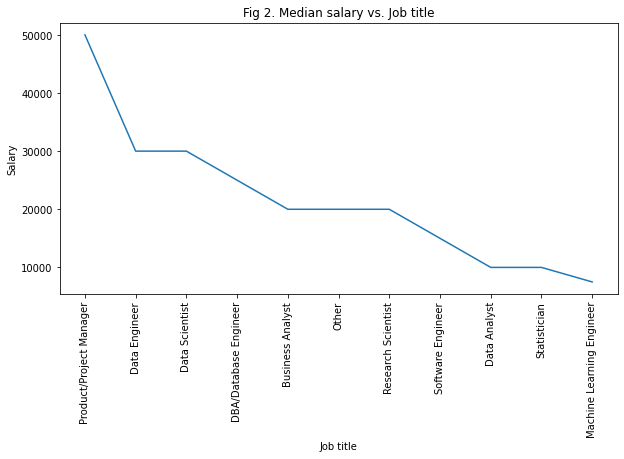

In [ ]:
#2. For different job titles, highest median salary to lowest median salary
plt.figure(figsize=(10, 5))
plt.plot(df1.groupby('job_title').median().sort_values(by=['salary'], ascending=False).index, df1.groupby('job_title').median().sort_values(by=['salary'], ascending=False).salary)
plt.xticks(rotation=90)
plt.title('Fig 2. Median salary vs. Job title')
plt.xlabel('Job title')
plt.ylabel('Salary')
plt.show()

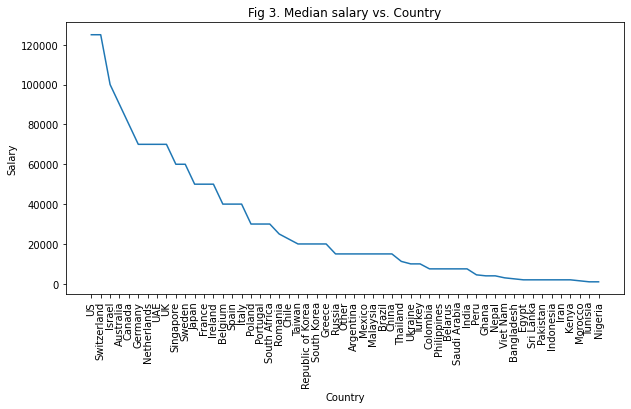

In [ ]:
#3. For different countries, highest median salary to lowest median salary
plt.figure(figsize=(10, 5))
plt.plot(df1.groupby('country').median().sort_values(by=['salary'], ascending=False).index, df1.groupby('country').median().sort_values(by=['salary'], ascending=False).salary)
plt.xticks(rotation=90)
plt.title('Fig 3. Median salary vs. Country')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.show()

All three trend analyses use the median salary because it is more representative of the general population than the mean salary. Fig 1 shows the median salary trend for different age groups, from age 18-21, the median salary increases and peaks at age 55-59, then decreases after that. Fig 2 shows the median salary trend for different job titles, sorted from highest salary to lowest salary, the title with highest salary is product/project manager, while the title with least salary is machine learning engineer. Fig 3 shows the median salary in different countries, also sorted from highest to lowest, the US and Switzerland crown in this category while Nigeria scores the lowest.

# Men vs. Women in ML&DS

## Descriptive Statistics

In [ ]:
df2 = df1[['gender','salary']]
gender_data = df2.groupby('gender')

# display the observed means for different gender groups
gender_data.mean()

,salary
gender,
Man,50750.619928
Nonbinary,110050.000000
Prefer not to say,64316.793893
Prefer to self-describe,50217.391304
Woman,36417.112299


In [ ]:
df2.loc[df2['gender']=='Woman'][['salary']].describe()

,salary
count,1683.000000
mean,36417.112299
std,59442.716093
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,50000.000000
max,500000.000000


In [ ]:
df2.loc[df2['gender']=='Man'][['salary']].describe()

,salary
count,8872.000000
mean,50750.619928
std,70347.974812
min,1000.000000
25%,3000.000000
50%,25000.000000
75%,70000.000000
max,500000.000000


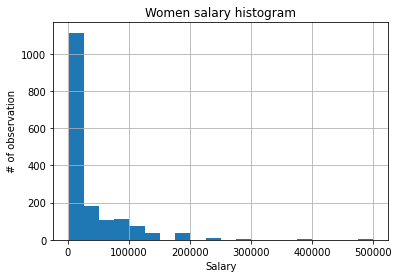

In [ ]:
df2.loc[df2['gender']=='Woman'][['salary']].hist(bins=20)

plt.title('Women salary histogram')
plt.xlabel('Salary')
plt.ylabel('# of observation')
plt.show()

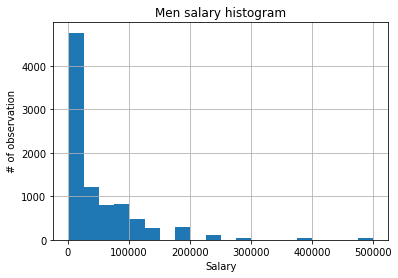

In [ ]:
df2.loc[df2['gender']=='Man'][['salary']].hist(bins=20)

plt.title('Men salary histogram')
plt.xlabel('Salary')
plt.ylabel('# of observation')
plt.show()

The descriptive statistics show that in this dataset, the size of men and women differs significantly. In addition, although the two gender groups have the same max and min values, men appear to be earning a lot more than women as a group. The male group has higher mean, median and other quantile measurements. They also appear to have different standard deviations.

The histograms review that the distribution of the salary is not normal for either group, majority of the survey participants earns a lower salary compared to others in their gender group. The shapes of the distributions are very positively skewed.


## Two-sample t-test on original data

In [ ]:
#Levene's test for equality of variances
f_salary = df2.loc[df2['gender']=='Woman'][['salary']]
m_salary = df2.loc[df2['gender']=='Man'][['salary']]

w2b, p2b = stats.levene(m_salary['salary'], f_salary['salary'])
print(f"Levene's test: test statistic = {w2b.round(2)}, p-value = {p2b.round(2)}")
print("Given a p-value less than 0.05, the two groups have different variances.")


Levene's test: test statistic = 42.42, p-value = 0.0
Given a p-value less than 0.05, the two groups have different variances.


In [ ]:
#The two-sample t-test, equality of variances not assumed
t2b, t_p2b = stats.ttest_ind(m_salary, f_salary, equal_var=False)
print(f"Two sample t-test: test statistic = {t2b.round(2)}, p-value = {t_p2b.round(2)}")
print("Given a p-value less than 0.05, the two groups have different means.")

Two sample t-test: test statistic = [8.79], p-value = [0.]
Given a p-value less than 0.05, the two groups have different means.


In order to determine whether the difference in means of the two groups are statistically significant, a two-sample t-test is performed with a 0.05 threshold. The assumptions of t-test are:

1. the data are continuous
2. the two samples are independent
3. both samples are simple random samples from their respective 
4. the data follow the normal distribution
5. the variance of the two populations are equal (or use Aspin-Welch test)

Since salaries are being investigated, the data are indeed continuous. Given the data collection and sampling process, the samples should be independent and random. The normality of the data is implied because of the Central Limit Theorem, which states that for large samples, the sampling distribution of the mean is normal. The variance of the two population groups are tested using Levene’s test with center at the median because of the skewness of the distribution. The Levene’s test confirms that the two groups have different variances, therefore the Aspin-Welch test should be used.

The two-sample t-test is performed with no presumption of equal variances between groups, the test result rejects the null hypothesis, which means the difference between the mean of male group and female group is statistically significant.


## Bootstrap

A bootstrap is performed to the two groups of data, the sample sizes are equal to their respective data size, and both use 1000 replications. The bootstrapped distribution of both groups and the distribution of the difference in means are plotted as shown in Fig 4.


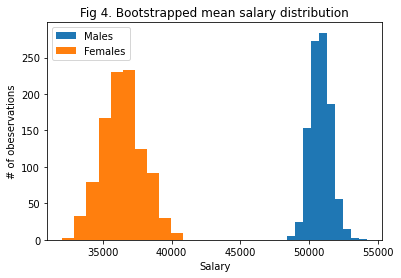

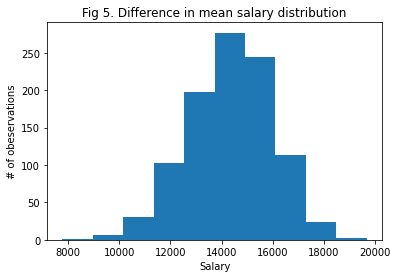

In [ ]:
#bootstrap for both groups
salary_m = []
salary_f = []
salary_diff = []

for i in range(1000): # take 1000 sets of bootstrap samples 
  # number of datapoints averaged equals the original sample size
  bootstrap_m = m_salary.sample(frac=1, replace=True)
  bootstrap_f = f_salary.sample(frac=1, replace=True) 

  # record the mean for each group for each set of bootstrap samples 
  salary_m.append(bootstrap_m['salary'].mean())
  salary_f.append(bootstrap_f['salary'].mean())
  salary_diff.append(bootstrap_m['salary'].mean()-bootstrap_f['salary'].mean())

plt.figure()
plt.hist(salary_m, bins=10);
plt.hist(salary_f, bins=10);
plt.title("Fig 4. Bootstrapped mean salary distribution")
plt.xlabel("Salary")
plt.ylabel("# of obeservations")
plt.legend(["Males", "Females"], loc='best')
plt.show()

plt.figure()
plt.hist(salary_diff, bins=10);
plt.title("Fig 5. Difference in mean salary distribution")
plt.xlabel("Salary")
plt.ylabel("# of obeservations")
plt.show()

## Two-sample t-test on bootstrapped data

In [ ]:
#Levene's test for equality of variances for bootstrapped data

w2d, p2d = stats.levene(salary_m, salary_f)
print(f"Levene's test: test statistic = {w2d.round(2)}, p-value = {p2d.round(2)}")
print("Given a p-value less than 0.05, the two groups have different variances.")

Levene's test: test statistic = 360.78, p-value = 0.0
Given a p-value less than 0.05, the two groups have different variances.


In [ ]:
#The two-sample t-test for bootstrapped data, equality of variances not assumed
t2d, t_p2d = stats.ttest_ind(salary_m, salary_f, equal_var=False)
print(f"Two sample t-test: test statistic = {t2d.round(2)}, p-value = {t_p2d.round(2)}")
print("Given a p-value less than 0.05, the two groups have different means.")

Two sample t-test: test statistic = 279.23, p-value = 0.0
Given a p-value less than 0.05, the two groups have different means.


Given all assumptions for the two-sample t-test still hold, the test can be performed again on the bootstrapped dataset. The levene test is conducted again, which shows the two groups have different variances, this can also be observed in Fig 4. The result of the t-test suggests that the two datasets have different means, which is not surprising given the clear dividing between the two groups in Fig 4. The difference between the mean of the two groups is normally distributed with most observations fall into the range of 14000 to 16000.

In summary, the t-tests performed on the dataset both before and after bootstrap confirms that the difference between the mean of the male group and the female group is statistically significant. The result suggests that on a global scale, the jobs related to machine learning and data analytics pays more for an average male than female by 15,000 USD on average. 


# Different education levels in ML&DS

## Descriptive Statistics

In [ ]:
df3 = df1[['education','salary']]
education_data = df3.groupby('education')

# display the observed means for different education groups
education_data.mean()

,salary
education,
Bachelor’s degree,35732.824427
Doctoral degree,68719.441211
I prefer not to answer,29689.873418
Master’s degree,52120.106579
No formal education past high school,31853.773585
Professional degree,41892.553191
Some college/university study without earning a bachelor’s degree,40407.792208


In [ ]:
df3.loc[df3['education']=="Bachelor’s degree"][['salary']].describe()

,salary
count,3013.000000
mean,35732.824427
std,60247.753546
min,1000.000000
25%,1000.000000
50%,10000.000000
75%,50000.000000
max,500000.000000


In [ ]:
df3.loc[df3['education']=="Master’s degree"][['salary']].describe()

,salary
count,4879.000000
mean,52120.106579
std,67681.571528
min,1000.000000
25%,4000.000000
50%,25000.000000
75%,70000.000000
max,500000.000000


In [ ]:
df3.loc[df3['education']=="Doctoral degree"][['salary']].describe()

,salary
count,1718.000000
mean,68719.441211
std,85403.650394
min,1000.000000
25%,5000.000000
50%,40000.000000
75%,90000.000000
max,500000.000000


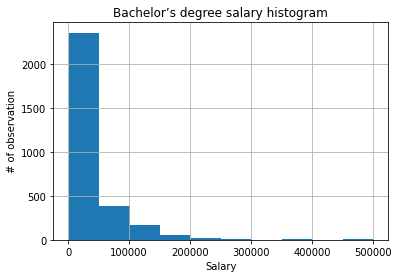

In [ ]:
df3.loc[df3['education']=="Bachelor’s degree"][['salary']].hist(bins=10)

plt.title('Bachelor’s degree salary histogram')
plt.xlabel('Salary')
plt.ylabel('# of observation')
plt.show()

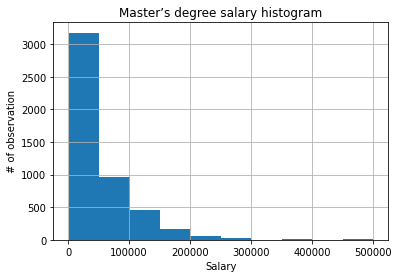

In [ ]:
df3.loc[df3['education']=="Master’s degree"][['salary']].hist(bins=10)
plt.title('Master’s degree salary histogram')
plt.xlabel('Salary')
plt.ylabel('# of observation')
plt.show()

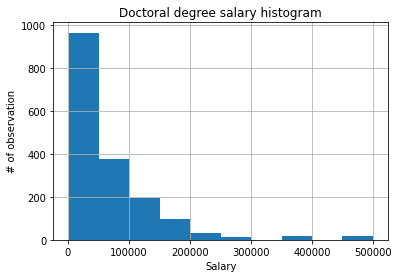

In [ ]:
df3.loc[df3['education']=="Doctoral degree"][['salary']].hist(bins=10)
plt.title('Doctoral degree salary histogram')
plt.xlabel('Salary')
plt.ylabel('# of observation')
plt.show()

This section compares the means of salary for three different groups, namely people holding Bachelor's degree, Master’s degree and Doctoral degree. The descriptive statistics for each group is presented above. Similar to the gender groups, the histograms in the notebook review that the distributions of the salary for all three groups are very positively skewed.

The descriptive statistic shows that the size of the three groups are different, and people with higher educational degrees appear to be earning more as shown with the mean, median and other quantile measurements.

## Anova test on original data

In [ ]:
#one way anova test
b_salary = df3.loc[df3['education']=="Bachelor’s degree"][['salary']]
ma_salary = df3.loc[df3['education']=="Master’s degree"][['salary']]
d_salary = df3.loc[df3['education']=="Doctoral degree"][['salary']]
f3b,p3b = stats.f_oneway(b_salary, m_salary, d_salary)
print(f"The ANOVA test: test statistic = {f3b.round(2)}, p-value = {p3b.round(2)}")
print("Given a p-value less than 0.05, as least one group has a different mean.")

The ANOVA test: test statistic = [123.07], p-value = [0.]
Given a p-value less than 0.05, as least one group has a different mean.


To compare means of more than two groups, an analysis of variance (ANOVA) test can be performed. The assumptions of the ANOVA test are: 

1. The population data have normal distribution
2. Equal variances between distribution
3. The data are independent

It should be noted that the ANOVA test is robust and the first two assumptions are not very strict. Given the large sample size, the normality of the data is implied by the Central Limit Theorem much like for the t-test. The variance between the groups is not too large, especially between Bachelor’s group and Master’s group. This report assumes that the difference in variance between the three groups is negligible when using the ANOVA test. The data should be independent.

Since there is only one variable, a one-way ANOVA test can be performed. As a result, the ANOVA test rejected the null hypothesis, meaning at least one group has a different mean to the other two. 


## Bootstrap

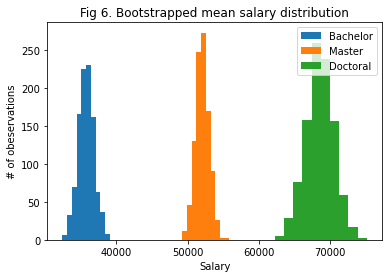

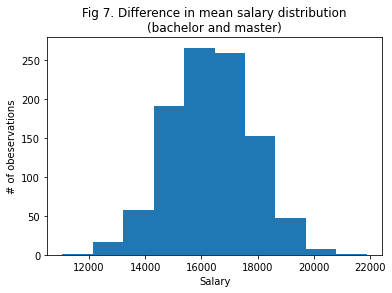

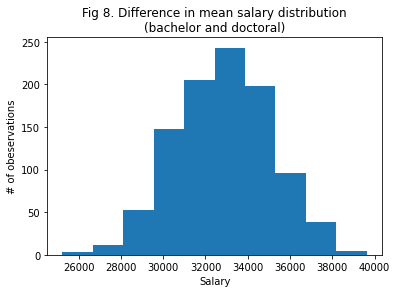

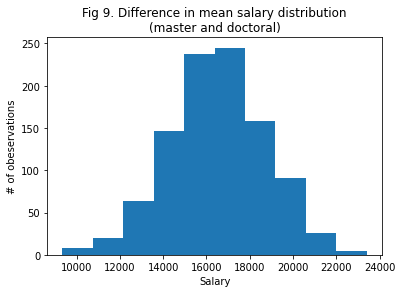

In [ ]:
salary_b = []
salary_ma = []
salary_d = []
diff_b_ma = []
diff_b_d = []
diff_ma_d = []

for i in range(1000): # take 1000 sets of bootstrap samples 
  # number of datapoints averaged equals the original sample size
  bootstrap_b = b_salary.sample(frac=1, replace=True)
  bootstrap_ma = ma_salary.sample(frac=1, replace=True) 
  bootstrap_d = d_salary.sample(frac=1, replace=True) 

  # record the mean for each group for each set of bootstrap samples 
  salary_b.append(bootstrap_b['salary'].mean())
  salary_ma.append(bootstrap_ma['salary'].mean())
  salary_d.append(bootstrap_d['salary'].mean())

  #record difference between different groups
  diff_b_ma.append(bootstrap_ma['salary'].mean()-bootstrap_b['salary'].mean())
  diff_b_d.append(bootstrap_d['salary'].mean()-bootstrap_b['salary'].mean())
  diff_ma_d.append(bootstrap_d['salary'].mean()-bootstrap_ma['salary'].mean())

plt.figure()
plt.hist(salary_b, bins=10);
plt.hist(salary_ma, bins=10);
plt.hist(salary_d, bins=10);
plt.title("Fig 6. Bootstrapped mean salary distribution")
plt.xlabel("Salary")
plt.ylabel("# of obeservations")
plt.legend(["Bachelor", "Master", 'Doctoral'], loc='best')
plt.show()

plt.figure()
plt.hist(diff_b_ma, bins=10);
plt.title("Fig 7. Difference in mean salary distribution\n(bachelor and master)")
plt.xlabel("Salary")
plt.ylabel("# of obeservations")
plt.show()


plt.figure()
plt.hist(diff_b_d, bins=10);
plt.title("Fig 8. Difference in mean salary distribution\n(bachelor and doctoral)")
plt.xlabel("Salary")
plt.ylabel("# of obeservations")
plt.show()


plt.figure()
plt.hist(diff_ma_d, bins=10);
plt.title("Fig 9. Difference in mean salary distribution\n(master and doctoral)")
plt.xlabel("Salary")
plt.ylabel("# of obeservations")
plt.show()


A bootstrap is performed to the three groups of data, the sample sizes are equal to their respective data size, and both use 1000 replications. The bootstrapped distribution of all three groups and the distribution of the difference in means are plotted as shown in Fig 6.

## Anova test on bootstrapped data

In [ ]:
#one way anova test with bootstrapped data
f3d,p3d = stats.f_oneway(salary_b, salary_ma, salary_d)
print(f"The ANOVA test: test statistic = {f3d.round(2)}, p-value = {p3d.round(2)}")
print("Given a p-value less than 0.05, at least one group has a different mean.")

The ANOVA test: test statistic = 125540.14, p-value = 0.0
Given a p-value less than 0.05, at least one group has a different mean.


Given all assumptions for the one-way ANOVA test still hold, the test can be performed again on the bootstrapped dataset. The result of the ANOVA test suggests that at least one dataset has different means from the other two, which is not surprising given the clear dividing between the three groups in the figure. The differences between the mean of the groups are normally distributed, Fig 7 shows the difference in mean salary between bachelor’s degree and master’s degree, with most observations falling around 16000. Fig 8 shows the difference in mean salary between bachelor’s degree and doctoral degree, with most observations falling around 32000. Fig 9 shows the difference in mean salary between master’s degree and doctoral degree, with most observations falling around 16000 to 18000.


In summary, the ANOVA test confirms that the differences between the mean of the three groups are statistically significant. The result suggests that on a global scale, the jobs related to machine learning and data analytics pays more for people with higher degrees, an average doctor can earn 32,000 USD more than an average person with a bachelor's degree.